# Sparse PCA su giocattolo

In [220]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from pyvis.network import Network
sns.set()

from scipy.spatial.distance import euclidean
from sklearn.decomposition import SparsePCA

In [221]:
df = pd.read_excel("DBgang27x14.xlsx")
df.rename(columns={"Unnamed: 0":"Name"},inplace=True)
df.set_index("Name",inplace=True)
df.head()

,Jet,Sharks,20s,30s,40s,JH,COL,HS,Single,Married,Divorced,Pusher,Bookie,Burglar
Name,,,,,,,,,,,,,,
ART,1,0,0,0,1,1,0,0,1,0,0,1,0,0
AL,1,0,0,1,0,1,0,0,0,1,0,0,0,1
SAM,1,0,1,0,0,0,1,0,1,0,0,0,1,0
CLYDE,1,0,0,0,1,1,0,0,1,0,0,0,1,0
MIKE,1,0,0,1,0,1,0,0,1,0,0,0,1,0


In [222]:
df_features = df[df.columns[2:]]
df_features.head()

,20s,30s,40s,JH,COL,HS,Single,Married,Divorced,Pusher,Bookie,Burglar
Name,,,,,,,,,,,,
ART,0,0,1,1,0,0,1,0,0,1,0,0
AL,0,1,0,1,0,0,0,1,0,0,0,1
SAM,1,0,0,0,1,0,1,0,0,0,1,0
CLYDE,0,0,1,1,0,0,1,0,0,0,1,0
MIKE,0,1,0,1,0,0,1,0,0,0,1,0


In [223]:
df_features.describe()

,20s,30s,40s,JH,COL,HS,Single,Married,Divorced,Pusher,Bookie,Burglar
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.370370,0.481481,0.148148,0.370370,0.222222,0.407407,0.481481,0.370370,0.148148,0.333333,0.333333,0.333333
std,0.492103,0.509175,0.362014,0.492103,0.423659,0.500712,0.509175,0.492103,0.362014,0.480384,0.480384,0.480384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
# eta'
# ~48.14% trentenni
# ~37.03% ventenni
# ~14.81% quarantenni
# stima eta' media = 24.5*0.3703 + 34.5*0.4814 + 44.5*0.1481 ~~ 32.27 anni
# le percentuali ci fanno pensare ad un skewed distribution

# istruzione
# JH = 37.03%
# COL = 22.22%
# HS = 40.74%

# Single 0.481481	Married 0.370370	Divorced 0.148148
# Pusher 0.333333	Bookie 0.333333	    Burglar 0.333333

### Sparse PCA

In [225]:
spca = SparsePCA(n_components=6)
spca.fit(df_features.values)
spca.components_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.4622799 ,  0.88673406],
       [-0.67416573,  0.7385801 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.68477544,  0.        ,
        -0.72875414,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.88708767,
        -0.46160098,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.73855466, -0.6741936 ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  

In [226]:
df_pca_comp = pd.DataFrame(data = spca.components_,
                           columns = df_features.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
df_pca_comp

,20s,30s,40s,JH,COL,HS,Single,Married,Divorced,Pusher,Bookie,Burglar
Component 1,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,-0.462280,0.886734
Component 2,-0.674166,0.73858,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Component 3,0.000000,0.00000,0.0,0.684775,0.0,-0.728754,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Component 4,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.887088,-0.461601,0.000000
Component 5,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.738555,-0.674194,0.0,0.000000,0.000000,0.000000
Component 6,0.000000,0.00000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [227]:
title = "Heatmap delle componenti Sparse PCA"
fig = px.imshow(df_pca_comp,color_continuous_scale='RdBu_r',aspect="auto")
fig.write_html(title+".html")
fig.show()

In [228]:
cod_componenti = []

In [229]:
descrittori_componente1 = df_pca_comp.iloc[0][abs(df_pca_comp.iloc[0])>0.2]
descrittori_componente1

Bookie     -0.462280
Burglar     0.886734
Name: Component 1, dtype: float64

In [230]:
# scassinatore
cod_componenti.append("(1)Scassinatore")

In [231]:
descrittori_componente2 = df_pca_comp.iloc[1][abs(df_pca_comp.iloc[1])>0.2]
descrittori_componente2

20s   -0.674166
30s    0.738580
Name: Component 2, dtype: float64

In [232]:
# trentenne
cod_componenti.append("(2)Trentenne")

In [233]:
descrittori_componente3 = df_pca_comp.iloc[2][abs(df_pca_comp.iloc[2])>0.2]
descrittori_componente3

JH     0.684775
HS    -0.728754
Name: Component 3, dtype: float64

In [234]:
# istruzione bassa
cod_componenti.append("(3)Istr. Bassa")

In [235]:
descrittori_componente4 = df_pca_comp.iloc[3][abs(df_pca_comp.iloc[3])>0.2]
descrittori_componente4

Pusher     0.887088
Bookie    -0.461601
Name: Component 4, dtype: float64

In [236]:
# pusher
cod_componenti.append("(4)Spacciatore")

In [237]:
descrittori_componente5 = df_pca_comp.iloc[4][abs(df_pca_comp.iloc[4])>0.2]
descrittori_componente5

Single      0.738555
Married    -0.674194
Name: Component 5, dtype: float64

In [238]:
# single
cod_componenti.append("(5)Single")

In [239]:
descrittori_componente6 = df_pca_comp.iloc[5][abs(df_pca_comp.iloc[5])>0.2]
descrittori_componente6

40s    1.0
Name: Component 6, dtype: float64

In [240]:
# quarantenne
cod_componenti.append("(6)Quarantenne")

In [241]:
scores_pca = spca.transform(df_features)
df_spca = pd.DataFrame(data=scores_pca, index=df_features.index, columns=cod_componenti)
df_spca = pd.concat([df_spca,df[df.columns[:2]]],axis=1)
df_spca['Gang'] = df_spca['Jet '].apply(lambda x : 'Jet' if x==1 else 'Sharks')
df_spca.drop(columns=['Jet ', 'Sharks '],inplace = True)

/home/davide/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but SparsePCA was fitted without feature names



In [242]:
title = "Heatmap su componenti Sparse PCA"
fig  = px.imshow(df_spca[df_spca.columns[:-1]],color_continuous_scale='RdBu_r',aspect='Auto',title = title,height=800)
fig.write_html(title+".html")
fig.show()

In [243]:
title = "Heatmap su componenti Sparse PCA JET"
fig  = px.imshow(df_spca[df_spca['Gang']=='Jet'][df_spca.columns[:-1]],color_continuous_scale='RdBu_r',aspect='Auto',title = title)
fig.show()

In [244]:
title = "Heatmap componenti Sparse PCA Sharks"
px.imshow(df_spca[df_spca['Gang']=='Sharks'][df_spca.columns[:-1]],color_continuous_scale='RdBu_r',aspect='Auto',title = title)

In [245]:
df_spca_noise = df_spca
for col in df_spca_noise.columns[:-1]:
    df_spca_noise[col] = df_spca_noise[col] + (np.random.randn( len(df_spca_noise[col]) ) /15.0)

In [246]:
title = "Visualizzazione 2d su componenti principali (1,2) Sparse PCA"
fig = px.scatter(df_spca_noise.reset_index(),x=cod_componenti[0],y=cod_componenti[1],text="Name",color="Gang",title = title)
fig.update_traces(textposition='top center')
fig.write_html(title+".html")
fig.show()

In [247]:
title = "Visualizzazione 3d su componenti principali (1,2,3) Sparse PCA"
fig = px.scatter_3d(df_spca_noise.reset_index(),x=cod_componenti[0],y=cod_componenti[1],z=cod_componenti[2],text="Name"
                  ,range_x=(-1.8,2.8),range_y=(-1.8,1.8),range_z = (-1.8,1.8), color="Gang", title = title)
fig.update_traces(textposition='top center')
fig.write_html(title+".html")
fig.show()

### Analisi profilo medio

In [248]:
df_jet_means = df_spca[df_spca['Gang']=="Jet"][df_spca.columns[:]].describe().loc[['mean']]
df_jet_means


,(1)Scassinatore,(2)Trentenne,(3)Istr. Bassa,(4)Spacciatore,(5)Single,(6)Quarantenne
mean,0.016959,-0.314566,0.294981,0.026562,0.159346,-0.014596


In [249]:
df_sharks_means = df_spca[df_spca['Gang']=="Sharks"][df_spca.columns[:]].describe().loc[['mean']]
df_sharks_means

,(1)Scassinatore,(2)Trentenne,(3)Istr. Bassa,(4)Spacciatore,(5)Single,(6)Quarantenne
mean,-0.019105,0.366373,-0.32253,-0.003873,-0.174559,0.045738


In [250]:
df_means = pd.concat([df_jet_means,df_sharks_means])
df_means['Gang'] = ["Jet","Sharks"]
df_means.reset_index(drop=True,inplace=True)
df_means = df_means.transpose()
df_means.reset_index(inplace=True)
df_means.columns = df_means.iloc[-1]
df_means = df_means.iloc[:-1]
df_means

6,Gang,Jet,Sharks
0,(1)Scassinatore,0.016959,-0.019105
1,(2)Trentenne,-0.314566,0.366373
2,(3)Istr. Bassa,0.294981,-0.32253
3,(4)Spacciatore,0.026562,-0.003873
4,(5)Single,0.159346,-0.174559
5,(6)Quarantenne,-0.014596,0.045738


In [251]:
title = 'Profilo medio Jet e Sharks'
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_means['Jet'],
      theta=df_means['Gang'],
      fill='toself',
      name='Jet'
))
fig.add_trace(go.Scatterpolar(
      r=df_means['Sharks'],
      theta=df_means['Gang'],
      fill='toself',
      name='Sharks'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False,
  title = title
)

fig.write_html(title+".html")
fig.show()


In [252]:
title = 'Visualizzazione su componenti discriminanti 2 e 3'
fig = px.scatter(df_spca_noise.reset_index(),x=cod_componenti[1],y=cod_componenti[2],text="Name",color="Gang", title = title)
fig.update_traces(textposition='top center')
fig.write_html(title+".html")
fig.show()

In [253]:
title = 'Visualizzazione su componenti discriminanti 2 3 e 5'
fig = px.scatter_3d(df_spca_noise.reset_index(),x=cod_componenti[1],y=cod_componenti[2],z=cod_componenti[4],text="Name"
                  ,range_x=(-2,3),range_y=(-2,2),range_z = (-2,2), color="Gang", title = title)
fig.update_traces(textposition='top center')
fig.write_html(title+".html")
fig.show()

In [254]:
# calcolo distanze euclidee
df_in_graph = df_spca[df_spca.columns[:-2]]
components = df_in_graph.values
adj_matrix = []
for i in range (0,df_in_graph.shape[0]):
    adj_row = []
    for j in range (0, df_in_graph.shape[0]):
        adj_row.append(euclidean(components[i],components[j]))
    adj_matrix.append(adj_row)
adj_matrix
components = df_in_graph.index
df_adj = pd.DataFrame(data = adj_matrix, columns=components, index=components)

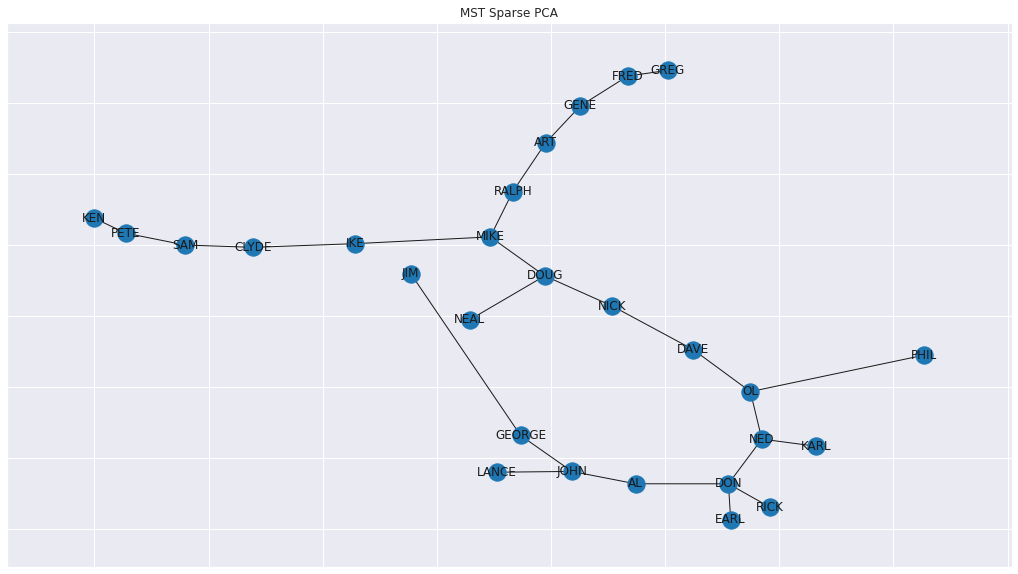

In [258]:
title = "MST Sparse PCA"
G = nx.from_pandas_adjacency(df_adj)
MST = nx.minimum_spanning_tree(G)
plt.figure(figsize=(18,10))
plt.title(title)
nx.draw_networkx(MST)
plt.savefig(title+".png")

In [256]:
nt = Network('900px', '1600px')
nt.from_nx(MST)
nt.show_buttons(filter_=['physics'])
nt.show('SparsePCA.html')